In [452]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as cs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [453]:
df = pd.read_csv('spaceship-Titanic.csv')

In [454]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [456]:
percent_missing = df.isnull().mean()*100
percent_missing

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

The missing values comprise a small percentage so moving forward I'll fill them in using the mean and mode.

### First let's extract the numerical features separately from the categorical:

In [457]:
numerical_feat = df.select_dtypes(exclude=['bool', 'object']).columns.tolist()
df[numerical_feat].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [458]:
categorical_feat = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_feat].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


### Handling missing data

In [459]:
for col in numerical_feat:
    df[col] = df[col].fillna(df[col].mean())

df[numerical_feat].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [460]:
for col in categorical_feat:
    df[col] = df[col].fillna(df[col].mode()[0])


df[categorical_feat].isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

### Checking for duplicates

In [461]:
df.duplicated().any()

False

### Creating new features:

In [462]:
#creating a toal expenses column:

# df['total_exp'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'] 

total_exp = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'] 
df.insert(12, 'total_exp', total_exp)

df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_exp,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,Willy Santantines,True


In [463]:
#Splitting Cabin into Deck, number and side.

df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df['Cabin'].str.split('/', expand = True)


# cabin_deck, cabin_num, cabin_side = df['Cabin'].str.split('/', expand=True)
# df.insert(4, 'cabin_deck', cabin_deck)
# df.insert(5, 'cabin_num', cabin_num)
# df.insert(6, 'cabin_side', cabin_side)

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_exp,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,Willy Santantines,True,F,1,S


In [464]:
#Splitting Passenger Id into group and number:

df[['passenger_grp', 'passenger_num']] = df['PassengerId'].str.split('_', expand= True).astype(int)

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_exp,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,Juanna Vines,True,F,0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,Altark Susent,False,A,0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,Solam Susent,False,A,0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,Willy Santantines,True,F,1,S,4,1


### Mapping categorical data

In [465]:
#CryoSleep mapping

cryo_mapping = {True: 1 , False: 0}


# df['CryoSleep'].dtype

In [466]:
df['CryoSleep'] = df['CryoSleep'].map(cryo_mapping)

In [467]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_exp,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,8536.0,Gravior Noxnuther,False,A,98,P,9276,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,9278,1
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1873.0,Fayey Connon,True,G,1500,S,9279,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,4637.0,Celeon Hontichre,False,E,608,S,9280,1
8692,9280_02,Europa,0,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,4826.0,Propsh Hontichre,True,E,608,S,9280,2


In [468]:
#VIP mapping

vip_mapping = {True: 1, False: 0}

In [469]:
df['VIP'] = df['VIP'].map(vip_mapping)

df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_exp,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,Gravior Noxnuther,False,A,98,P,9276,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,9278,1
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1873.0,Fayey Connon,True,G,1500,S,9279,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,Celeon Hontichre,False,E,608,S,9280,1
8692,9280_02,Europa,0,E/608/S,TRAPPIST-1e,44.0,0,126.0,4688.0,0.0,0.0,12.0,4826.0,Propsh Hontichre,True,E,608,S,9280,2


In [470]:
#Transported mapping

transported_mapping ={True: 1, False: 0} 

In [471]:
df['Transported'] = df['Transported'].map(transported_mapping)

df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_exp,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,Gravior Noxnuther,0,A,98,P,9276,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S,9278,1
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1873.0,Fayey Connon,1,G,1500,S,9279,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,Celeon Hontichre,0,E,608,S,9280,1
8692,9280_02,Europa,0,E/608/S,TRAPPIST-1e,44.0,0,126.0,4688.0,0.0,0.0,12.0,4826.0,Propsh Hontichre,1,E,608,S,9280,2


In [472]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [473]:
planet_mapping = {'Europa':0, 'Earth': 1, 'Mars': 2}

In [474]:
df['HomePlanet'] = df['HomePlanet'].map(planet_mapping)

In [475]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [476]:
destination_mapping = {'TRAPPIST-1e':0, 'PSO J318.5-22': 1, '55 Cancri e': 2}

In [477]:
df['Destination'] = df['Destination'].map(destination_mapping)

In [478]:
df['Cabin_Deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [479]:
deck_mapping = {
    'A':0, 
    'B': 1, 
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7
    
}

In [480]:
df['Cabin_Deck'] = df['Cabin_Deck'].map(deck_mapping)

In [481]:
df['Cabin_Side'].unique()

array(['P', 'S'], dtype=object)

In [482]:
side_mapping = {'P': 0, 'S': 1}

In [483]:
df['Cabin_Side'] = df['Cabin_Side'].map(side_mapping)

In [484]:
df.dtypes

PassengerId       object
HomePlanet         int64
CryoSleep          int64
Cabin             object
Destination        int64
Age              float64
VIP                int64
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
total_exp        float64
Name              object
Transported        int64
Cabin_Deck         int64
Cabin_Num         object
Cabin_Side         int64
passenger_grp      int64
passenger_num      int64
dtype: object

<AxesSubplot:>

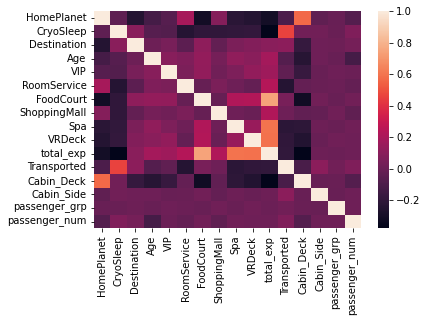

In [485]:
sns.heatmap(df.corr())

### Dropping unnecessary columns

In [486]:
#As I have the total expenses in place, these are redundant 

df.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)

In [487]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_exp,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,Maham Ofracculy,0,1,0,0,1,1
1,0002_01,1,0,F/0/S,0,24.0,0,736.0,Juanna Vines,1,5,0,1,2,1
2,0003_01,0,0,A/0/S,0,58.0,1,10383.0,Altark Susent,0,0,0,1,3,1
3,0003_02,0,0,A/0/S,0,33.0,0,5176.0,Solam Susent,0,0,0,1,3,2
4,0004_01,1,0,F/1/S,0,16.0,0,1091.0,Willy Santantines,1,5,1,1,4,1


In [488]:
#drop the name col 

df.drop(columns=['Name'], inplace=True)

In [489]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,total_exp,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0,1,0,0,1,1
1,0002_01,1,0,F/0/S,0,24.0,0,736.0,1,5,0,1,2,1
2,0003_01,0,0,A/0/S,0,58.0,1,10383.0,0,0,0,1,3,1
3,0003_02,0,0,A/0/S,0,33.0,0,5176.0,0,0,0,1,3,2
4,0004_01,1,0,F/1/S,0,16.0,0,1091.0,1,5,1,1,4,1


In [490]:
#drop cabin as i broke it down into three columns

df.drop(columns= ['Cabin'], inplace=True)

In [491]:
Transported = df['Transported']

In [492]:
df.drop(columns=['Transported'], inplace=True)

In [493]:
df['Transported'] = Transported

In [494]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,total_exp,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num,Transported
0,0001_01,0,0,0,39.0,0,0.0,1,0,0,1,1,0
1,0002_01,1,0,0,24.0,0,736.0,5,0,1,2,1,1
2,0003_01,0,0,0,58.0,1,10383.0,0,0,1,3,1,0
3,0003_02,0,0,0,33.0,0,5176.0,0,0,1,3,2,0
4,0004_01,1,0,0,16.0,0,1091.0,5,1,1,4,1,1


### Handlinfg outliers:

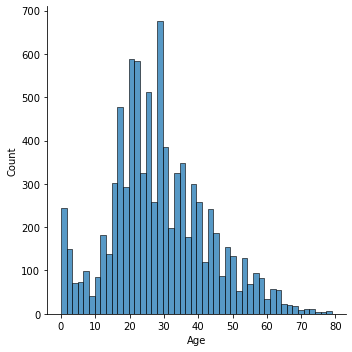

In [495]:
sns.displot(df['Age'], height=5)

<AxesSubplot:xlabel='Age'>

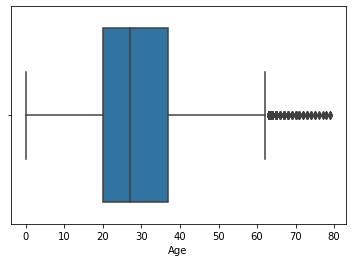

In [496]:
sns.boxplot(x = df['Age'])

In [497]:
df['Age'].describe()

count    8693.000000
mean       28.827930
std        14.339054
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [498]:
max_threshold = df['Age'].quantile(.98)
max_threshold

min_threshold = df['Age'].min()
min_threshold

0.0

In [499]:
new_Age = df[(df['Age'] < max_threshold) & (df['Age']> min_threshold)]

<AxesSubplot:xlabel='Age'>

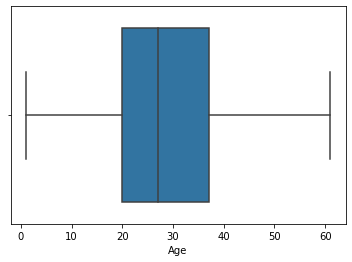

In [500]:
sns.boxplot(x = new_Age['Age'])

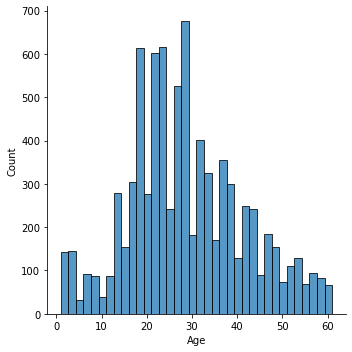

In [501]:
sns.displot(new_Age['Age'])

In [502]:
##Now that I removed outliers, shall i replace the age variables in the dataframe with these transfromed values??

# df['Age'] = new_Age

In [503]:
scaler = MinMaxScaler()

In [504]:
df['Age'] = scaler.fit_transform(df['Age'].to_numpy().reshape(-1,1))

In [505]:
df['Age'].describe()

count    8693.000000
mean        0.364911
std         0.181507
min         0.000000
25%         0.253165
50%         0.341772
75%         0.468354
max         1.000000
Name: Age, dtype: float64

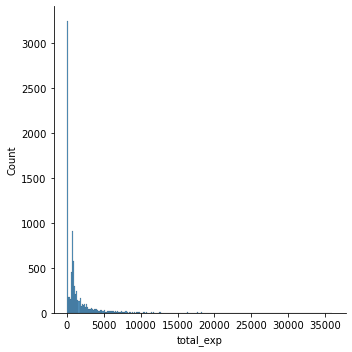

In [506]:
sns.displot(df['total_exp'], height=5)

<AxesSubplot:xlabel='total_exp'>

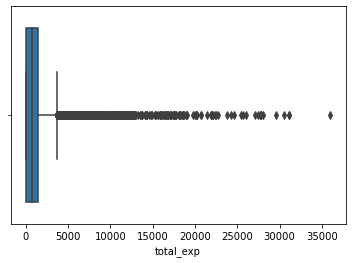

In [507]:
sns.boxplot(x = df['total_exp'])

In [508]:
df['total_exp'].describe()

count     8693.000000
mean      1472.487559
std       2799.915709
min          0.000000
25%          0.000000
50%        727.000000
75%       1461.000000
max      35987.000000
Name: total_exp, dtype: float64

In [509]:
scaler = StandardScaler()

In [510]:
df['total_exp'] = scaler.fit_transform(df['total_exp'].to_numpy().reshape(-1,1))

<AxesSubplot:xlabel='total_exp'>

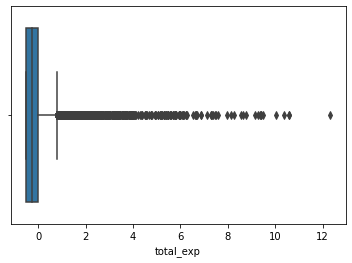

In [511]:
sns.boxplot(x = df['total_exp'])

In [512]:
df['total_exp'].describe()

count    8.693000e+03
mean     7.175006e-17
std      1.000058e+00
min     -5.259345e-01
25%     -5.259345e-01
50%     -2.662689e-01
75%     -4.103059e-03
max      1.232769e+01
Name: total_exp, dtype: float64

In [513]:
max_threshold = df['total_exp'].quantile(.85)
max_threshold

min_threshold = df['total_exp'].min()
min_threshold

-0.5259344970137887

In [514]:
new_total_exp = df[(df['total_exp'] < max_threshold) & (df['total_exp'] > min_threshold)]

<AxesSubplot:xlabel='total_exp'>

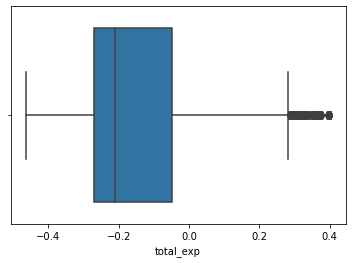

In [515]:
sns.boxplot(x = new_total_exp['total_exp'])

### Checking Correaltion 

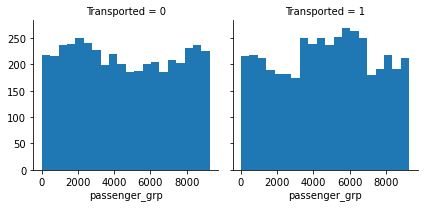

In [516]:
g = sns.FacetGrid(df, col = 'Transported')
g.map(plt.hist,'passenger_grp', bins=20)

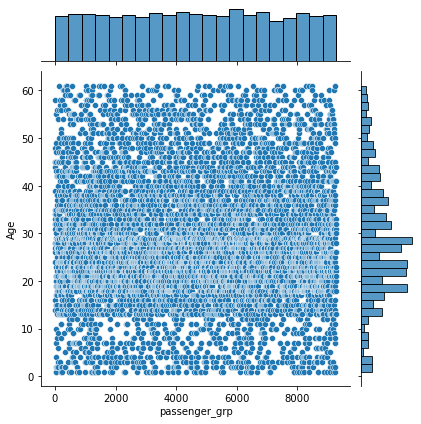

In [517]:
sns.jointplot(x='passenger_grp', y=new_Age['Age'], data=df) #kind can be reg or kde or scatter 

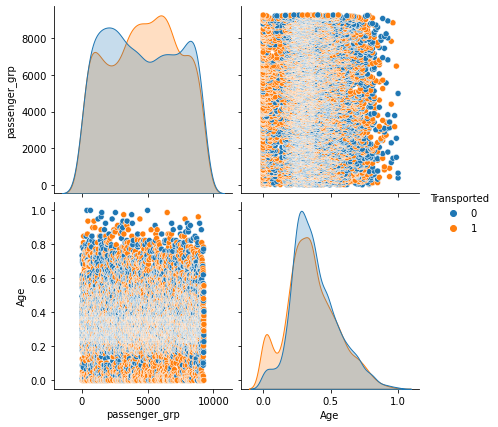

In [518]:
sns.pairplot(df, hue='Transported', vars=['passenger_grp', 'Age'], height=3)


In [519]:
df.set_index('PassengerId')

,HomePlanet,CryoSleep,Destination,Age,VIP,total_exp,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num,Transported
PassengerId,,,,,,,,,,,,
0001_01,0,0,0,0.493671,0,-0.525934,1,0,0,1,1,0
0002_01,1,0,0,0.303797,0,-0.263054,5,0,1,2,1,1
0003_01,0,0,0,0.734177,1,3.182605,0,0,1,3,1,0
0003_02,0,0,0,0.417722,0,1.322799,0,0,1,3,2,0
0004_01,1,0,0,0.202532,0,-0.136257,5,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,0,0,2,0.518987,1,2.522904,0,98,0,9276,1,0
9278_01,1,1,1,0.227848,0,-0.525934,6,1499,1,9278,1,0
9279_01,1,0,0,0.329114,0,0.143053,6,1500,1,9279,1,1


### Logistic Regression

In [520]:
y = df['Transported']
df.drop(columns=['Transported'], inplace = True)
X = df


In [521]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,total_exp,Cabin_Deck,Cabin_Num,Cabin_Side,passenger_grp,passenger_num
0,0001_01,0,0,0,0.493671,0,-0.525934,1,0,0,1,1
1,0002_01,1,0,0,0.303797,0,-0.263054,5,0,1,2,1
2,0003_01,0,0,0,0.734177,1,3.182605,0,0,1,3,1
3,0003_02,0,0,0,0.417722,0,1.322799,0,0,1,3,2
4,0004_01,1,0,0,0.202532,0,-0.136257,5,1,1,4,1


In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [523]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6519, 12)
(2174, 12)
(6519,)
(2174,)


In [524]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [525]:
model = LogisticRegression()

model.fit(X_train, y_train)

predicted = model.predict(X_test)

score = accuracy_score(predicted, y_test)

print(score*100)

52.483900643974245
